Import Libraries

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import os
os.chdir('/content/drive/My Drive/Data Analysis Files')

In [128]:
df = pd.read_csv('Housing.csv')  # File path sahi hone chahiye


Load & Explore Data

In [130]:
# Load dataset
df = pd.read_csv('Housing.csv')

# Display first 5 rows
print(df.head())

# Check basic info
print(df.info())

# Statistical summary
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

Preprocess Categorical Data


In [131]:
# Convert yes/no to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

Feature-Target Split


In [132]:
X = df.drop('price', axis=1)  # Features (area, bedrooms)
y = df['price']               # Target


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
feature_names = X.columns.tolist()  # ['area', 'bedrooms']


Train-Test Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


In [136]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# NumPy array ko phir se DataFrame mein convert karo
X = pd.DataFrame(X_imputed, columns=feature_names)


In [137]:
# Check missing values in ENTIRE dataset
print(df.isnull().sum())


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [97]:
# Check all categorical columns (like 'furnishingstatus') encoded
print(df.head())  # Columns like as 'furnishingstatus_semi-furnished'


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

In [112]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Fit ONLY on train
X_test = imputer.transform(X_test)        # Transform test
X_imputed = imputer.fit_transform(X)

In [113]:
# Convert back to DataFrame with CORRECT features
X = pd.DataFrame(X_imputed, columns=feature_names)

In [114]:
# NaN values check AFTER imputation
print("\nAFTER Imputation:")
print(X.isnull().sum())  # ALL zero


AFTER Imputation:
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [116]:
print("Number of Features:", len(X.columns))
print("Model Coefficients Shape:", model.coef_.shape)


Number of Features: 13
Model Coefficients Shape: (7,)


Train Model

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Evaluate Model

In [108]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


MAE: 1112059.185889846
MSE: 2229169358205.0586
RMSE: 1493040.306959279
R² Score: 0.5589794483892094


Interpret Results

In [138]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,  # NOT original X.columns
    'Coefficient': model.coef_})

Visualization

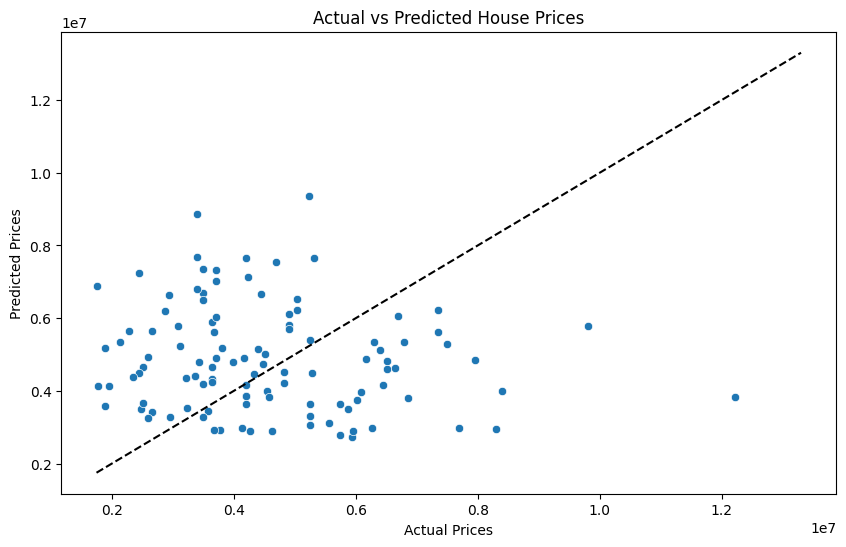

In [139]:
# Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()
